In [1]:
pip install openmeteo_requests


In [2]:
pip install requests-cache retry-requests numpy pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.7 MB/s eta 0:00:00


In [21]:
import openmeteo_requests
import requests_cache
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from retry_requests import retry


In [4]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)
url = "https://api.open-meteo.com/v1/forecast"

In [5]:
def apiOpenMeteo(latitude, longitude, cidade):
	params = {
		"latitude": latitude,
		"longitude": longitude,
		"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation_probability", "precipitation", "rain", "showers", "snowfall", "pressure_msl", "cloud_cover", "visibility", "wind_speed_10m", "wind_direction_10m", "wind_gusts_10m"],
		"timezone": "America/Sao_Paulo",
		"past_days": 92
	}
	responses = openmeteo.weather_api(url, params=params)

	# Process first location. Add a for-loop for multiple locations or weather models
	response = responses[0]
	print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
	print(f"Cidade: {cidade}")

	# Process hourly data. The order of variables needs to be the same as requested.
	hourly = response.Hourly()
	hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
	hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
	hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
	hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
	hourly_precipitation_probability = hourly.Variables(4).ValuesAsNumpy()
	hourly_precipitation = hourly.Variables(5).ValuesAsNumpy()
	hourly_rain = hourly.Variables(6).ValuesAsNumpy()
	hourly_showers = hourly.Variables(7).ValuesAsNumpy()
	hourly_snowfall = hourly.Variables(8).ValuesAsNumpy()
	hourly_pressure_msl = hourly.Variables(9).ValuesAsNumpy()
	hourly_cloud_cover = hourly.Variables(10).ValuesAsNumpy()
	hourly_visibility = hourly.Variables(11).ValuesAsNumpy()
	hourly_wind_speed_10m = hourly.Variables(12).ValuesAsNumpy()
	hourly_wind_direction_10m = hourly.Variables(13).ValuesAsNumpy()
	hourly_wind_gusts_10m = hourly.Variables(14).ValuesAsNumpy()

	hourly_data = {"date": pd.date_range(
		start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
		end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
		freq = pd.Timedelta(seconds = hourly.Interval()),
		inclusive = "left"
	)}
	hourly_data["temperature_2m"] = hourly_temperature_2m
	hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
	hourly_data["dew_point_2m"] = hourly_dew_point_2m
	hourly_data["apparent_temperature"] = hourly_apparent_temperature
	hourly_data["precipitation_probability"] = hourly_precipitation_probability
	hourly_data["precipitation"] = hourly_precipitation
	hourly_data["rain"] = hourly_rain
	hourly_data["showers"] = hourly_showers
	hourly_data["snowfall"] = hourly_snowfall
	hourly_data["pressure_msl"] = hourly_pressure_msl
	hourly_data["cloud_cover"] = hourly_cloud_cover
	hourly_data["visibility"] = hourly_visibility
	hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
	hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
	hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

	hourly_dataframe = pd.DataFrame(data = hourly_data)
	hourly_dataframe["cidade"] = cidade

	return hourly_dataframe

In [6]:
capitaisBr = [
    {"capital": "Maceió", "latitude": -8.1756, "longitude": -34.8631},
    {"capital": "São Paulo", "latitude": -23.5522, "longitude": -46.6333},
    {"capital": "Goiânia", "latitude": -16.6892, "longitude": -49.2786},
    {"capital": "Florianópolis", "latitude": -27.5945, "longitude": -48.5669},
    {"capital": "Belo Horizonte", "latitude": -19.9211, "longitude": -47.8333},
    {"capital": "Manaus", "latitude": -3.1056, "longitude": -60.0250},
    {"capital": "Salvador", "latitude": -12.9792, "longitude": -38.4750},
    {"capital": "Porto Velho", "latitude": -8.7792, "longitude": -62.7883},
    {"capital": "Rio de Janeiro", "latitude": -22.8833, "longitude": -43.2333},
    {"capital": "Natal", "latitude": -5.7950, "longitude": -35.7100},
    {"capital": "Curitiba", "latitude": -25.4272, "longitude": -49.6931},
    {"capital": "Recife", "latitude": -8.0500, "longitude": -34.9417},
    {"capital": "Cuiabá", "latitude": -15.6008, "longitude": -57.9172},
    {"capital": "Porto Alegre", "latitude": -30.0333, "longitude": -51.2000},
    {"capital": "Aracaju", "latitude": -9.9211, "longitude": -37.9250},
    {"capital": "Rio Branco", "latitude": -9.9750, "longitude": -67.8333},
    {"capital": "Belém", "latitude": -1.4000, "longitude": -48.4833},
    {"capital": "João Pessoa", "latitude": -7.9667, "longitude": -34.8750},
    {"capital": "Teresina", "latitude": -5.1050, "longitude": -42.8167},
    {"capital": "Palmas", "latitude": -10.2750, "longitude": -48.3333},
    {"capital": "Vitória", "latitude": -20.3122, "longitude": -40.3333},
    {"capital": "Fortaleza", "latitude": -3.7172, "longitude": -38.5431},
    {"capital": "São Luís", "latitude": -2.5100, "longitude": -44.3250},
    {"capital": "Campo Grande", "latitude": -20.4500, "longitude": -54.6083},
    {"capital": "Boa Vista", "latitude": -4.5000, "longitude": -66.9250},
    {"capital": "Maceió", "latitude": -8.1756, "longitude": -34.8631},
    {"capital": "Belo Horizonte", "latitude": -19.9211, "longitude": -47.8333},
    {"capital": "Curitiba", "latitude": -25.4272, "longitude": -49.6931},
    {"capital": "Florianópolis", "latitude": -27.5945, "longitude": -48.5669},
    {"capital": "Porto Alegre", "latitude": -30.0333, "longitude": -51.2000},
    {"capital": "Aracaju", "latitude": -9.92, "longitude": -37}
]


In [7]:
df = pd.DataFrame()
for elem in capitaisBr:
    dfTemp = apiOpenMeteo(elem["latitude"], elem["longitude"], elem["capital"])
    df = pd.concat([df, dfTemp], axis=0, ignore_index=True)


Coordinates -8.125°N -34.875°E
Cidade: Maceió
Coordinates -23.5°N -46.625°E
Cidade: São Paulo
Coordinates -16.75°N -49.25°E
Cidade: Goiânia
Coordinates -27.625°N -48.5°E
Cidade: Florianópolis
Coordinates -19.875°N -47.875°E
Cidade: Belo Horizonte
Coordinates -3.125°N -60.0°E
Cidade: Manaus
Coordinates -12.875°N -38.5°E
Cidade: Salvador
Coordinates -8.75°N -62.75°E
Cidade: Porto Velho
Coordinates -22.875°N -43.25°E
Cidade: Rio de Janeiro
Coordinates -5.75°N -35.75°E
Cidade: Natal
Coordinates -25.375°N -49.75°E
Cidade: Curitiba
Coordinates -8.0°N -35.0°E
Cidade: Recife
Coordinates -15.625°N -57.875°E
Cidade: Cuiabá
Coordinates -30.0°N -51.25°E
Cidade: Porto Alegre
Coordinates -9.875°N -37.875°E
Cidade: Aracaju
Coordinates -10.0°N -67.875°E
Cidade: Rio Branco
Coordinates -1.375°N -48.5°E
Cidade: Belém
Coordinates -8.0°N -34.875°E
Cidade: João Pessoa
Coordinates -5.125°N -42.875°E
Cidade: Teresina
Coordinates -10.25°N -48.375°E
Cidade: Palmas
Coordinates -20.125°N -40.5°E
Cidade: Vitória
C

In [8]:
df.head(10)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation_probability,precipitation,rain,showers,snowfall,pressure_msl,cloud_cover,visibility,wind_speed_10m,wind_direction_10m,wind_gusts_10m,cidade
0,2024-02-28 03:00:00+00:00,26.913000,87.0,24.564409,32.476170,100.0,1.0,0.0,1.0,0.0,1012.500000,92.0,5000.0,6.120000,180.000000,15.840000,Maceió
1,2024-02-28 04:00:00+00:00,26.763000,87.0,24.417009,32.284882,100.0,0.9,0.0,0.9,0.0,1011.700012,87.0,5860.0,5.760000,180.000000,14.040000,Maceió
2,2024-02-28 05:00:00+00:00,26.613001,87.0,24.269608,31.936813,100.0,0.6,0.0,0.6,0.0,1011.299988,88.0,23140.0,6.480000,180.000000,13.679999,Maceió
3,2024-02-28 06:00:00+00:00,25.713001,90.0,23.948116,31.068081,100.0,0.4,0.0,0.4,0.0,1011.700012,88.0,23100.0,4.896529,197.102814,13.679999,Maceió
4,2024-02-28 07:00:00+00:00,25.713001,90.0,23.948116,31.068081,100.0,0.4,0.0,0.4,0.0,1011.700012,82.0,17520.0,4.896529,197.102814,11.159999,Maceió
5,2024-02-28 08:00:00+00:00,25.663000,90.0,23.898769,30.987591,100.0,0.2,0.0,0.2,0.0,1011.900024,84.0,24140.0,4.896529,197.102814,10.440001,Maceió
6,2024-02-28 09:00:00+00:00,25.913000,88.0,23.771496,31.141605,100.0,0.1,0.0,0.1,0.0,1012.299988,82.0,24140.0,5.014219,201.037582,11.159999,Maceió
7,2024-02-28 10:00:00+00:00,26.413000,85.0,23.686245,31.465206,84.0,0.0,0.0,0.0,0.0,1012.799988,85.0,24140.0,5.860375,190.619598,13.320000,Maceió
8,2024-02-28 11:00:00+00:00,27.163000,81.0,23.618565,32.017517,68.0,0.0,0.0,0.0,0.0,1013.299988,84.0,24140.0,6.924738,171.027451,16.199999,Maceió
9,2024-02-28 12:00:00+00:00,28.413000,74.0,23.330332,33.202442,52.0,0.0,0.0,0.0,0.0,1013.500000,73.0,11480.0,6.162207,186.709747,16.919998,Maceió


In [9]:
df.dtypes

date                         datetime64[ns, UTC]
temperature_2m                           float32
relative_humidity_2m                     float32
dew_point_2m                             float32
apparent_temperature                     float32
precipitation_probability                float32
precipitation                            float32
rain                                     float32
showers                                  float32
snowfall                                 float32
pressure_msl                             float32
cloud_cover                              float32
visibility                               float32
wind_speed_10m                           float32
wind_direction_10m                       float32
wind_gusts_10m                           float32
cidade                                    object
dtype: object

In [ ]:
# df['date'] = pd.to_datetime(df['date'])
# df['day'] = df['date'].dt.day
# df['month'] = df['date'].dt.month
# df['year'] = df['date'].dt.year
# df['time'] = df['date'].dt.time
# df

In [11]:
df[df['precipitation'] > 0.1]['precipitation'].describe()

count    13750.000000
mean         0.824902
std          0.934640
min          0.200000
25%          0.300000
50%          0.500000
75%          1.000000
max         11.900000
Name: precipitation, dtype: float64

In [12]:
colunas_numericas = df.select_dtypes(include=[int, float]).columns
colunas_numericas

Index(['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation_probability', 'precipitation',
       'rain', 'showers', 'snowfall', 'pressure_msl', 'cloud_cover',
       'visibility', 'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m'],
      dtype='object')

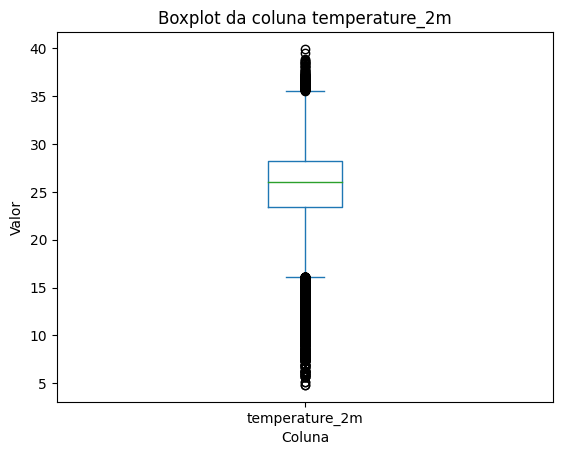

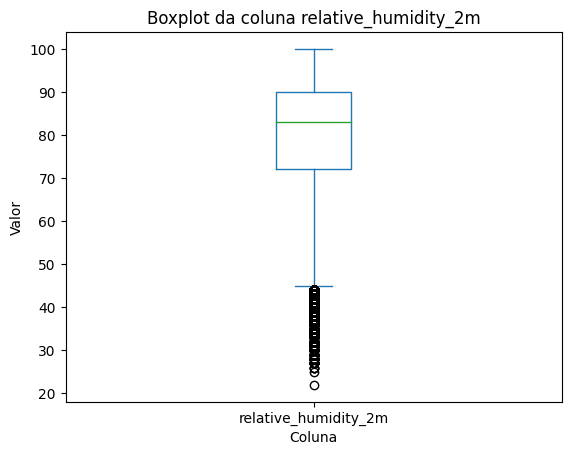

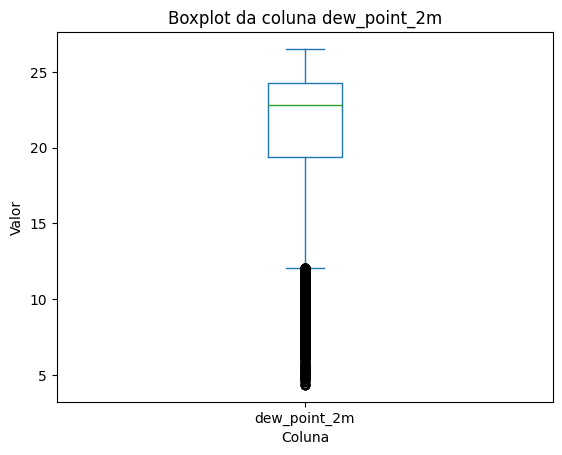

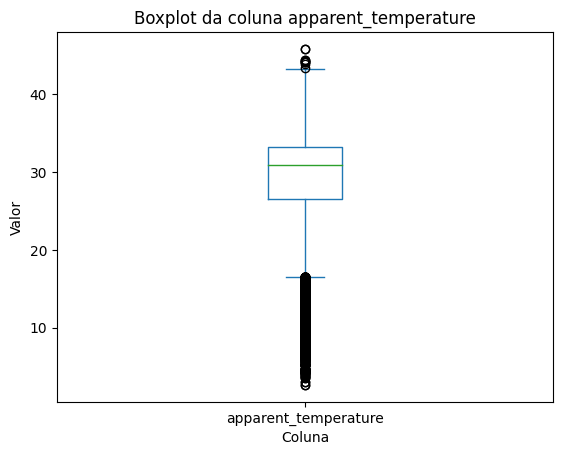

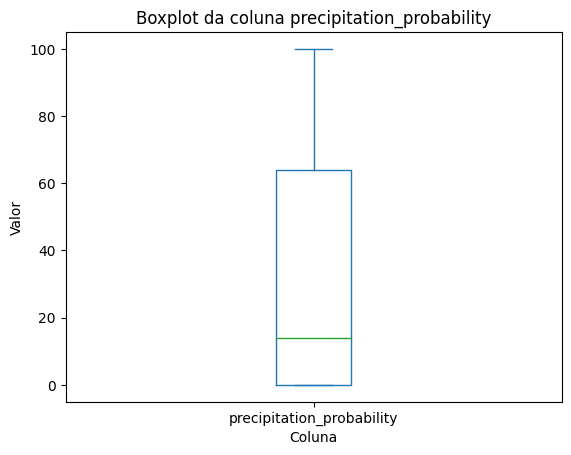

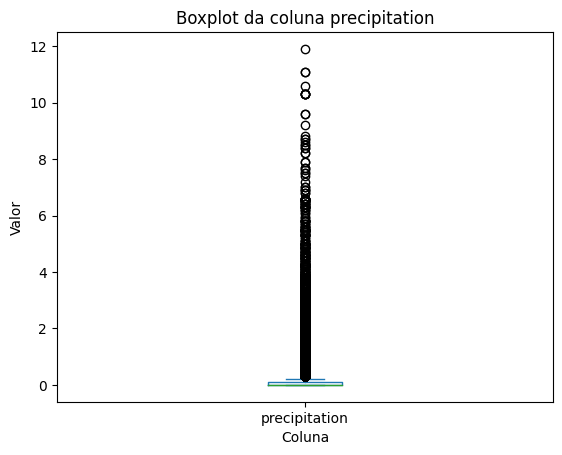

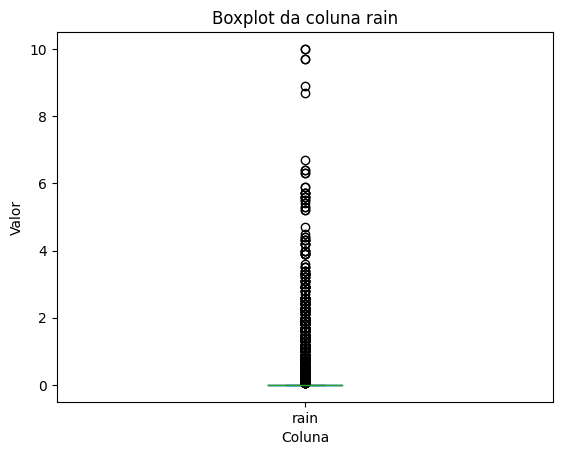

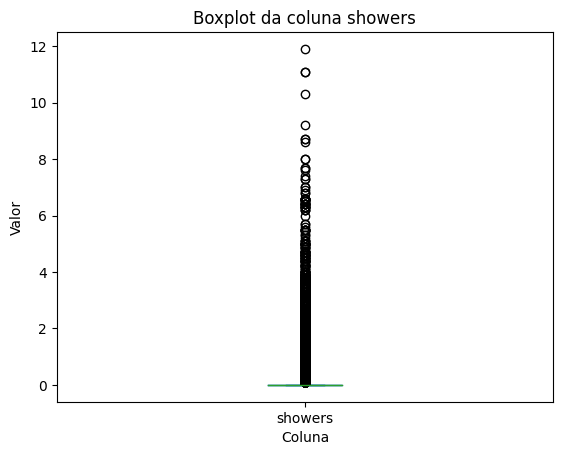

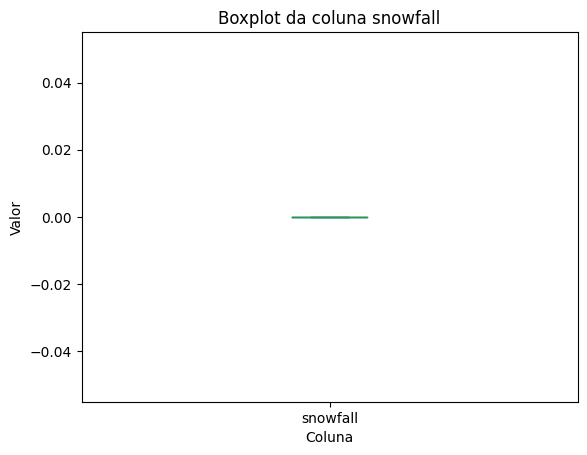

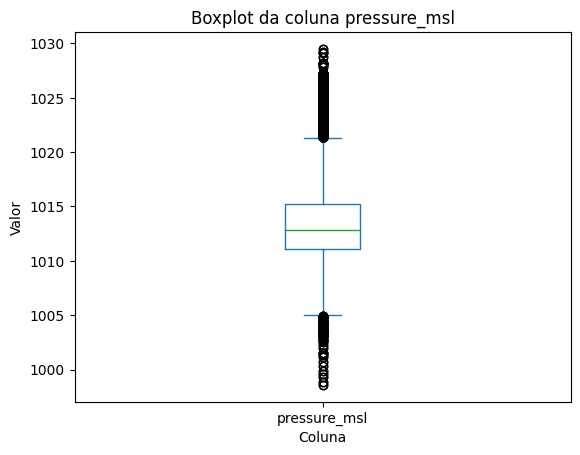

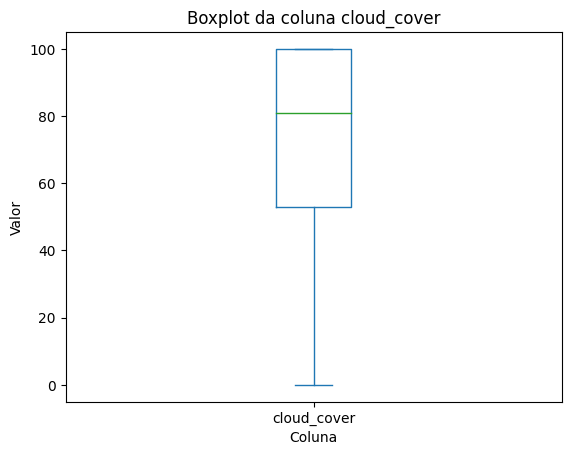

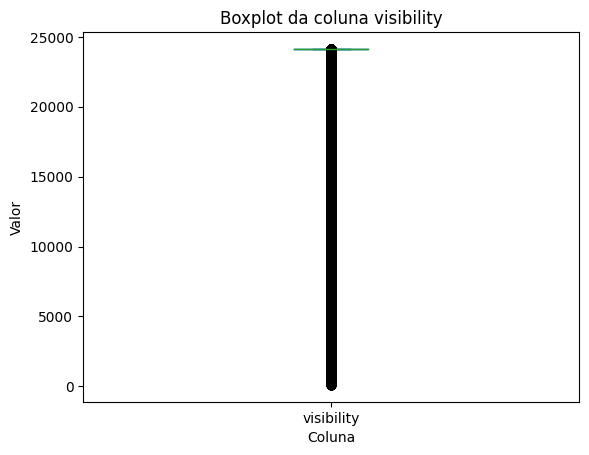

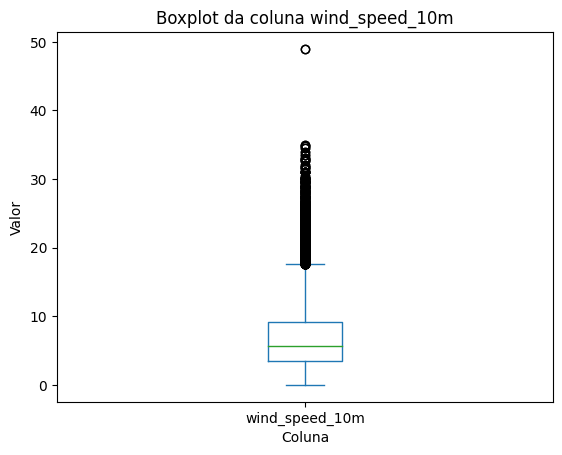

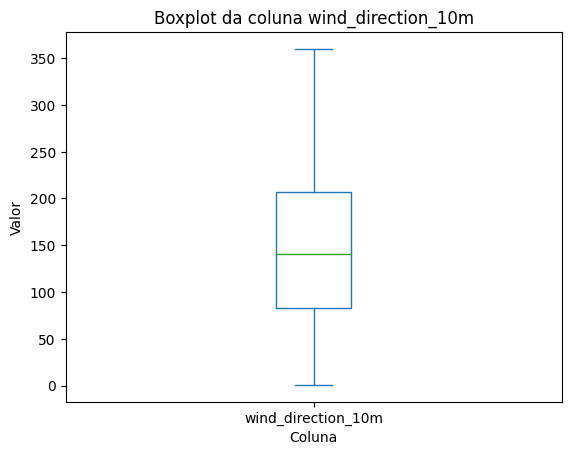

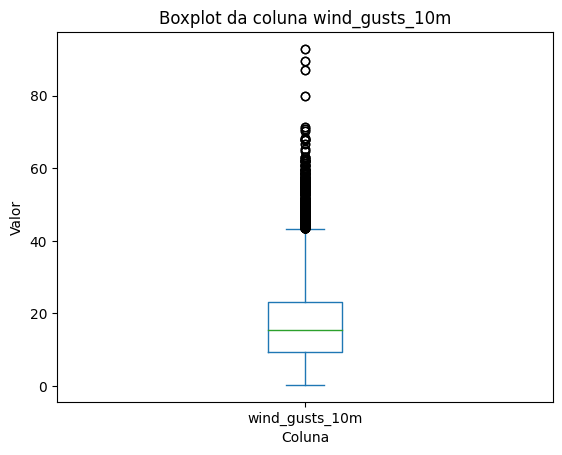

In [26]:
# for coluna in colunas_numericas:
#     df[coluna].plot.box()
#     plt.title(f'Boxplot da coluna {coluna}')
#     plt.xlabel('Coluna')
#     plt.ylabel('Valor')
#     plt.show()

In [13]:
df_norm = df.copy()
for coluna in colunas_numericas:
    nova_coluna = coluna + "_norm"
    print(nova_coluna)
    df_norm[nova_coluna] = (df[coluna] - df[coluna].mean()) / (df[coluna].std())

temperature_2m_norm
relative_humidity_2m_norm
dew_point_2m_norm
apparent_temperature_norm
precipitation_probability_norm
precipitation_norm
rain_norm
showers_norm
snowfall_norm
pressure_msl_norm
cloud_cover_norm
visibility_norm
wind_speed_10m_norm
wind_direction_10m_norm
wind_gusts_10m_norm


In [14]:
df_norm[['temperature_2m', 'temperature_2m_norm']].describe()

,temperature_2m,temperature_2m_norm
count,73656.000000,7.365600e+04
mean,25.489368,-2.651685e-08
std,4.380172,1.000000e+00
min,4.818500,-4.719191e+00
25%,23.390375,-4.792034e-01
50%,26.048000,1.275365e-01
75%,28.270000,6.348226e-01
max,39.949001,3.301157e+00
